In [30]:
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Certain characters require special escaping in TeX, such as: $ % & ~ ^ \ { } \( \) \[ \]
# https://stackoverflow.com/questions/65426069/use-of-mathbb-in-matplotlib
import matplotlib 
matplotlib.rc('xtick', labelsize=16)
matplotlib.rc('ytick', labelsize=16)
plt.rcParams.update({
    'font.size': 16,
    'text.usetex': True,
    'font.family': 'sans-serif',
    'font.sans-serif': 'Helvetica',
    'text.latex.preamble': r'\usepackage{amsfonts}'
})

In [31]:
def Lagrange(x, y):
    n = len(x)
    li = np.array([y[i]/np.prod(x[i] - np.delete(x,i)) for i in range(n)])
    p = lambda xp: np.dot(li,np.array([np.prod(xp - np.delete(x,j)) for j in range(n)]))
    return np.vectorize(p)

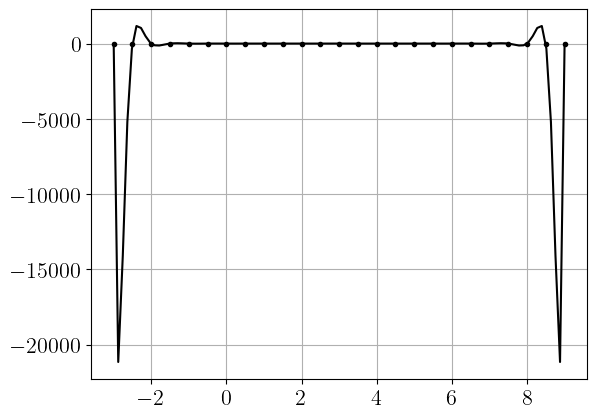

In [39]:
n = 25
k = np.arange(0,n)
xk = -3. + .5*k
yk = np.zeros(n)
yk[n//2] = 1.

p = Lagrange(xk,yk)

N = 100
a,b = xk[0],xk[-1]
x = np.linspace(a,b,N)
y = p(x)

plt.plot(xk,yk,'k.')
plt.plot(x,y,'k-')
plt.grid()
plt.show()

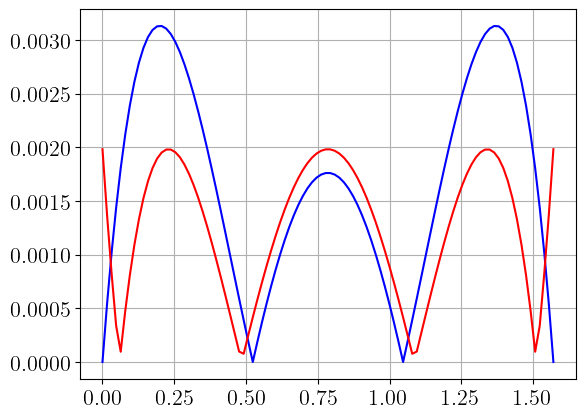

In [45]:
a,b = 0.,np.pi/2
xe = np.linspace(a,b,4)
i = np.arange(1,5)
xc = (a + b)/2. + (b - a)/2*np.cos((2*i - 1)*np.pi/8)

error_eq = lambda x: np.abs(np.prod(x - xe))/24
error_che = lambda x: np.abs(np.prod(x - xc))/24

error_eq_vec = np.vectorize(error_eq)
error_che_vec = np.vectorize(error_che)

x = np.linspace(a,b,100)
plt.plot(x,error_eq_vec(x),'b-')
plt.plot(x,error_che_vec(x),'r-')
plt.grid()
plt.show()